In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [7]:
dataset = pd.read_csv("Test.csv")

In [8]:
dataset.head()

,text,label
0,I always wrote this series off as being a comp...,0
1,1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...,0
2,This movie was so poorly written and directed ...,0
3,The most interesting thing about Miryang (Secr...,1
4,"when i first read about ""berlin am meer"" i did...",0


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5000 non-null   object
 1   label   5000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 78.2+ KB


In [10]:
dataset['label'].value_counts(normalize=True)

1    0.501
0    0.499
Name: label, dtype: float64

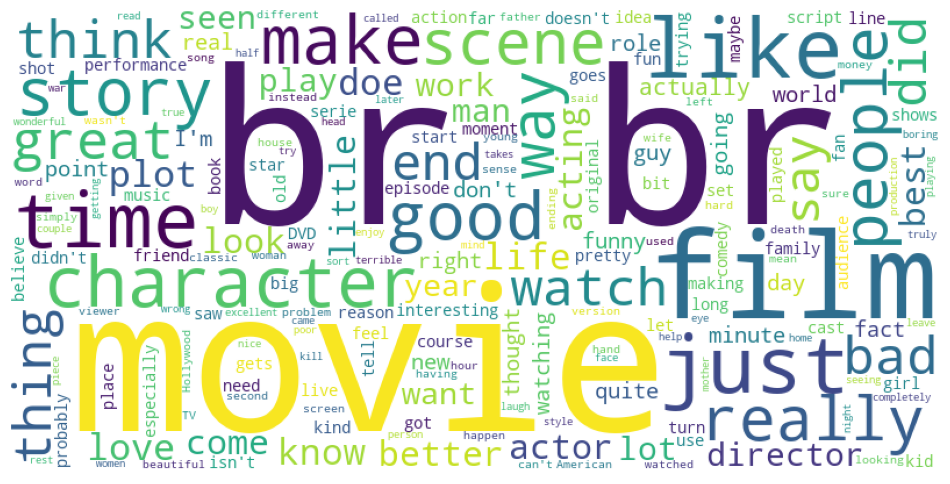

In [32]:
reviews = " ".join(dataset['text'])
word_cloud = WordCloud(background_color = 'white',
                      stopwords = ENGLISH_STOP_WORDS,
                      width = 800,height =400
                      )
word_cloud.generate(reviews)

plt.rcParams['figure.figsize'] = (12,8)
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

In [26]:
pattern = r"[a-zA-Z]+"

vect = TfidfVectorizer(
    token_pattern = pattern,
    stop_words = list(ENGLISH_STOP_WORDS),
    ngram_range = (1,2),
    max_features = 500
)

vect.fit(dataset["text"])

tokenized_features = vect.transform(dataset["text"])

features = pd.DataFrame( data = tokenized_features.toarray(),
                       columns = vect.get_feature_names_out())

features

,able,absolutely,act,acting,action,actor,actors,actress,actually,age,...,wouldn,wouldn t,writer,writing,written,wrong,year,years,yes,young
0,0.0,0.11897,0.0,0.000000,0.000000,0.109982,0.000000,0.0,0.000000,0.0,...,0.00000,0.00000,0.0,0.000000,0.000000,0.0,0.109358,0.000000,0.0,0.00000
1,0.0,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.00000,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.119861,0.0,0.00000
2,0.0,0.00000,0.0,0.168315,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.00000,0.00000,0.0,0.135323,0.127339,0.0,0.000000,0.000000,0.0,0.00000
3,0.0,0.00000,0.0,0.000000,0.057702,0.059835,0.049345,0.0,0.000000,0.0,...,0.00000,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.10984
4,0.0,0.00000,0.0,0.092981,0.000000,0.000000,0.106109,0.0,0.218641,0.0,...,0.00000,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.0,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.00000,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.00000
4996,0.0,0.00000,0.0,0.117593,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.00000,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.00000
4997,0.0,0.00000,0.0,0.000000,0.000000,0.000000,0.147729,0.0,0.000000,0.0,...,0.21268,0.21268,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.00000
4998,0.0,0.00000,0.0,0.161616,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.00000,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.00000


In [27]:
dataset["char_count"] = dataset["text"].str.count(r"\S")
""" creating a new column which counts character"""
dataset["word_count"] = dataset["text"].str.count(pattern)
dataset["avg_word_length"] = dataset["char_count"] / dataset["word_count"]


dataset.sample(3)

,text,label,char_count,word_count,avg_word_length
3319,But even caricatures need a plausible plot lin...,0,677,142,4.767606
2891,The first murder scene is one of the best murd...,1,300,69,4.347826
2847,"Okay, to be fair this movie did have an intere...",0,223,50,4.460000


In [29]:
x = pd.concat([features,dataset.loc[:, "char_count":]], axis = 1)
y = dataset["label"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

rf = RandomForestClassifier().fit(x_train,y_train)

y_pred = rf.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80       509
           1       0.79      0.79      0.79       491

    accuracy                           0.80      1000
   macro avg       0.80      0.80      0.80      1000
weighted avg       0.80      0.80      0.80      1000



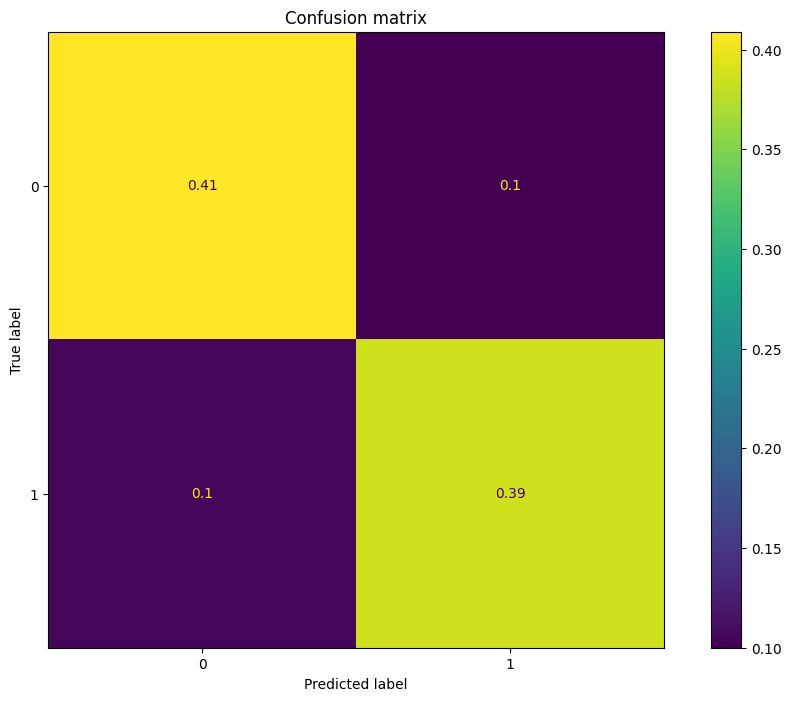

In [30]:
ConfusionMatrixDisplay.from_estimator(rf,x_test,y_test,normalize='all')
plt.title("Confusion matrix")
plt.show()

In [31]:
pd.DataFrame(
{
    "feature": x.columns, "importance": rf.feature_importances_
}).sort_values(by = "importance", ascending = False)

,feature,importance
23,bad,0.035330
488,worst,0.026071
179,great,0.022832
414,t,0.016866
21,awful,0.013298
...,...,...
115,earth,0.000450
278,michael,0.000444
213,husband,0.000438
15,aren t,0.000434
